In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as pcnt
# from skimage import measure
# from skimage.measure import regionprops
from prep_maze import *
from extract_maze import *

In [79]:
def gf2(preprocess_img, corners):

    prep_img = cv.copyMakeBorder(preprocess_img, 10, 10, 10, 10, cv.BORDER_CONSTANT, 0)
    cn1 = corners[0] + 10
    cn2 = corners[1] + 10
    cn3 = corners[2] + 10
    cn4 = corners[3] + 10

    dcn = np.abs(cn2 - cn1)
    if dcn[0] > dcn[1]:
        x = np.linspace(cn1[0], cn2[0], dcn[0])
        y = np.linspace(cn1[1], cn2[1], dcn[0])
    else:
        x = np.linspace(cn1[0], cn2[0], dcn[1])
        y = np.linspace(cn1[1], cn2[1], dcn[1])
    x = x.astype(int)
    y = y.astype(int)
    l1 = np.array([x, y]).T

    dcn = np.abs(cn3 - cn2)
    if dcn[0] > dcn[1]:
        x = np.linspace(cn2[0], cn3[0], dcn[0])
        y = np.linspace(cn2[1], cn3[1], dcn[0])
    else:
        x = np.linspace(cn2[0], cn3[0], dcn[1])
        y = np.linspace(cn2[1], cn3[1], dcn[1])
    x = x.astype(int)
    y = y.astype(int)
    l2 = np.array([x, y]).T

    dcn = np.abs(cn4 - cn3)
    if dcn[0] > dcn[1]:
        x = np.linspace(cn3[0], cn4[0], dcn[0])
        y = np.linspace(cn3[1], cn4[1], dcn[0])
    else:
        x = np.linspace(cn3[0], cn4[0], dcn[1])
        y = np.linspace(cn3[1], cn4[1], dcn[1])
    x = x.astype(int)
    y = y.astype(int)
    l3 = np.array([x, y]).T

    dcn = np.abs(cn1 - cn4)
    if dcn[0] > dcn[1]:
        x = np.linspace(cn4[0], cn1[0], dcn[0])
        y = np.linspace(cn4[1], cn1[1], dcn[0])
    else:
        x = np.linspace(cn4[0], cn1[0], dcn[1])
        y = np.linspace(cn4[1], cn1[1], dcn[1])
    x = x.astype(int)
    y = y.astype(int)
    l4 = np.array([x, y]).T

    k = 3
    gate1 = []
    gate2 = []
    gate3 = []
    gate4 = []
    for i in range(0,len(l1)):
        if np.max(prep_img[l1[i][1]-k:l1[i][1]+k, l1[i][0]-k:l1[i][0]+k]) == 0:
            gate1.append(l1[i])
    for i in range(0,len(l2)):
        if np.max(prep_img[l2[i][1]-k:l2[i][1]+k, l2[i][0]-k:l2[i][0]+k]) == 0:
            gate2.append(l2[i])
    for i in range(0,len(l3)):
        if np.max(prep_img[l3[i][1]-k:l3[i][1]+k, l3[i][0]-k:l3[i][0]+k]) == 0:
            gate3.append(l3[i])
    for i in range(0,len(l4)):
        if np.max(prep_img[l4[i][1]-k:l4[i][1]+k, l4[i][0]-k:l4[i][0]+k]) == 0:
            gate4.append(l4[i])
    
    gate1 = np.array(gate1)
    gate2 = np.array(gate2)
    gate3 = np.array(gate3)
    gate4 = np.array(gate4)
    gate = []

    if len(gate1) > 0:
        gate1 = [np.mean(gate1[:,0]).astype(np.uint)-10, np.mean(gate1[:,1]).astype(np.uint)-10]
        gate.append(gate1)
    if len(gate2) > 0:    
        gate2 = [np.mean(gate2[:,0]).astype(np.uint)-10, np.mean(gate2[:,1]).astype(np.uint)-10]
        gate.append(gate2)
    if len(gate3) > 0:
        gate3 = [np.mean(gate3[:,0]).astype(np.uint)-10, np.mean(gate3[:,1]).astype(np.uint)-10]
        gate.append(gate3)
    if len(gate4) > 0:
        gate4 = [np.mean(gate4[:,0]).astype(np.uint)-10, np.mean(gate4[:,1]).astype(np.uint)-10]
        gate.append(gate4)

    return gate 

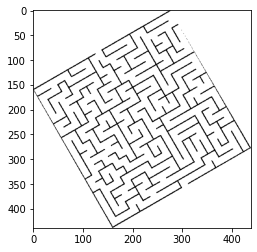

[[131, 82], [306, 352]]


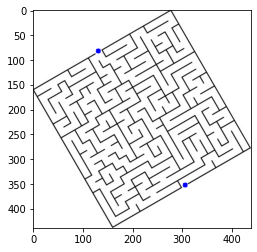

In [80]:
img = cv.imread('../data/inputs/rotated.jpg')
pre = preprocess(img)
em, cn = extract_maze(pre)
gates = gf2(pre, cn)
print(gates)
cv.circle(img, (gates[0][0], gates[0][1]), 5, (0,0,255), -1)
cv.circle(img, (gates[1][0], gates[1][1]), 5, (0,0,255), -1)
plt.imshow(img)
plt.show()